# MAIS 202 Fall 2019 - Application Coding Challenge Submission
# Yu Lu Liu 

## 1. Import the libraries I will be using

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 2. Read the two csv files provided

In [2]:
ownership_df = pd.read_csv("home_ownership_data.csv")
loan_df = pd.read_csv("loan_data.csv")

### The two dataframes now look like this:

In [3]:
ownership_df[:5]

,member_id,home_ownership
0,1030901,MORTGAGE
1,1247741,MORTGAGE
2,1261745,MORTGAGE
3,1264291,RENT
4,1269083,RENT


In [4]:
loan_df[:5]

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,...,0.00,0.00,171.62,16-Jan,0,INDIVIDUAL,0,NaN,NaN,NaN
1,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,...,117.08,1.11,119.66,13-Sep,0,INDIVIDUAL,0,NaN,NaN,NaN
2,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,...,0.00,0.00,649.91,16-Jan,0,INDIVIDUAL,0,NaN,NaN,NaN
3,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,...,0.00,0.00,357.48,15-Jan,0,INDIVIDUAL,0,NaN,NaN,NaN
4,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,...,0.00,0.00,67.79,16-Jan,0,INDIVIDUAL,0,NaN,NaN,NaN


## 3. Organizing the two dataframes by the members' ID numbers

In [5]:
ownership_df = ownership_df.set_index('member_id')
loan_df = loan_df.set_index('member_id')

ownership_df.sort_index(inplace=True)
loan_df.sort_index(inplace=True)

### The two dataframes are now sorted according to the members' ID numbers like so:

In [6]:
ownership_df[:5]

,home_ownership
member_id,
1030901,MORTGAGE
1247741,MORTGAGE
1261745,MORTGAGE
1264291,RENT
1269083,RENT


In [7]:
loan_df[:5]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,...,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
member_id,,,,,,,,,,,,,,,,,,,,,
1030901,8875,8875,8875.0,36 months,7.51,276.11,A,A3,1 year,38000.0,...,0.0,0.0,4472.80,13-Sep,0,INDIVIDUAL,0,NaN,NaN,NaN
1247741,5600,5600,5600.0,36 months,14.65,193.17,C,C3,1 year,85000.0,...,0.0,0.0,193.17,16-Jan,0,INDIVIDUAL,0,NaN,NaN,NaN
1261745,4375,4375,4375.0,36 months,7.51,136.11,A,A3,7 years,17108.0,...,0.0,0.0,144.94,14-Dec,0,INDIVIDUAL,0,NaN,NaN,NaN
1264291,16000,16000,16000.0,60 months,17.58,402.65,D,D4,7 years,65000.0,...,0.0,0.0,402.65,16-Jan,0,INDIVIDUAL,0,NaN,NaN,NaN
1269083,21000,21000,21000.0,36 months,12.42,701.73,B,B4,10+ years,105000.0,...,0.0,0.0,701.73,16-Jan,0,INDIVIDUAL,0,NaN,NaN,NaN


### Since the loan amount is the only column that interests us, I cut out the rest of the columns. The loan dataframe now looks like so:

In [8]:
loan_df = loan_df.loc[:, :'loan_amnt']
loan_df[:5]

,loan_amnt
member_id,
1030901,8875
1247741,5600
1261745,4375
1264291,16000
1269083,21000


## 4. Joining the two dataframes
### I need to link the home ownership status with the loan amount of each member. The new dataframe looks like so and contains all relevant information:

In [9]:
join = pd.concat([ownership_df, loan_df], axis = 1)
join[:5]

,home_ownership,loan_amnt
member_id,,
1030901,MORTGAGE,8875
1247741,MORTGAGE,5600
1261745,MORTGAGE,4375
1264291,RENT,16000
1269083,RENT,21000


## 5. Group the members by their home ownership status
### A new dataframe is created. It describes the total amount of loan per home ownership group:

In [10]:
grouped = join.groupby(by="home_ownership")
total_loan_per_ownership = grouped.sum()
total_loan_per_ownership

,loan_amnt
home_ownership,
MORTGAGE,715650
OWN,134450
RENT,1471975


### To calculate the average loan, I need the number of member per home ownership group. This information is contained in this series:

In [11]:
ownership_number = grouped.size()
ownership_number

home_ownership
MORTGAGE     53
OWN          14
RENT        133
dtype: int64

## 6. Calculation
### Using the information of the table and of the series, I created a new array containing the result of the calculation: 

In [12]:
averages_array = []
for i in range(3):
    averages_array.append(total_loan_per_ownership.iat[i,0] / ownership_number[i])
averages_array

[13502.830188679245, 9603.57142857143, 11067.481203007519]

### The final results are displayed in the following table (the same table is also outputted as a csv file):

In [13]:
final_result_df = pd.DataFrame(averages_array, index = ['MORTGAGE', 'OWN', 'RENT'], columns = ['AVERAGE LOAN AMOUNT'])
final_result_df.to_csv('final_result_table.csv')
final_result_df

,AVERAGE LOAN AMOUNT
MORTGAGE,13502.830189
OWN,9603.571429
RENT,11067.481203


## 7. Plot 
### The final results are plotted into the following graph (the same graph is also outputted as a png file):

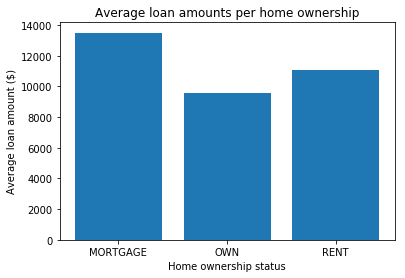

In [14]:
x = final_result_df.index
y = averages_array
plt.bar(final_result_df.index, averages_array, align='center')
plt.ylabel('Average loan amount ($)')
plt.xlabel('Home ownership status')
plt.title('Average loan amounts per home ownership')
plt.savefig('result_plot.png')